### K-Means

#### 동작 순서
1. k값 설정(k개의 그룹수)<br>
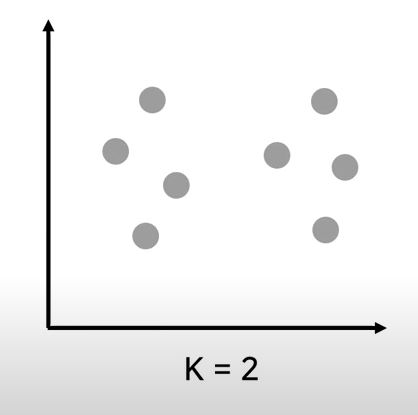
1. 지정된 k 개 만큼의 랜덤 좌표 설정<br>
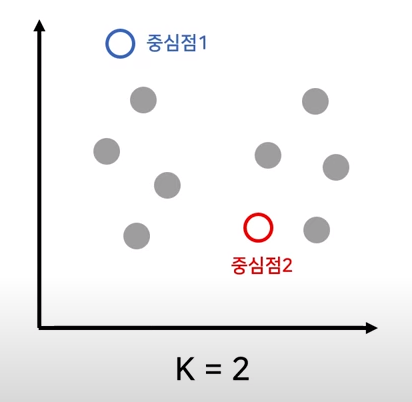
1. 모든 데이터로부터 가장 가까운 중심점 선택
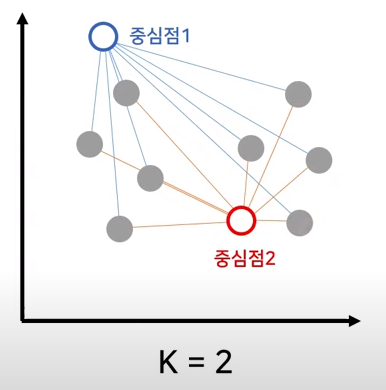
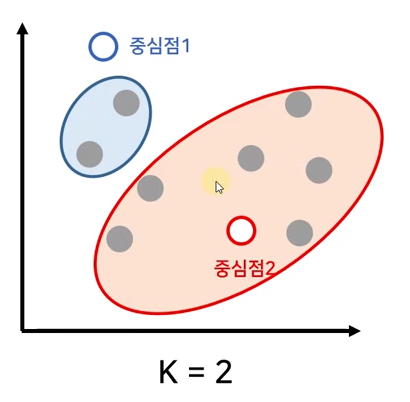
1. 데이터들의 평균 중심으로 중심점 이동
1. 중심점이 더 이상 이동되지 않을 때까지 반복 <br>
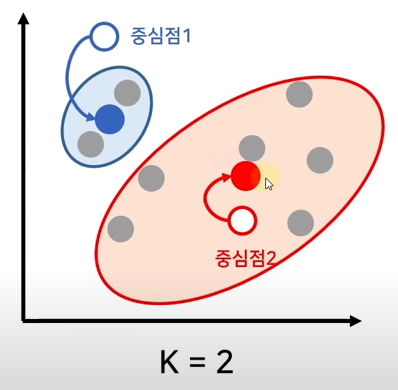

### (중심점) 무작위 선정 문제 (Random Initialization Trap)
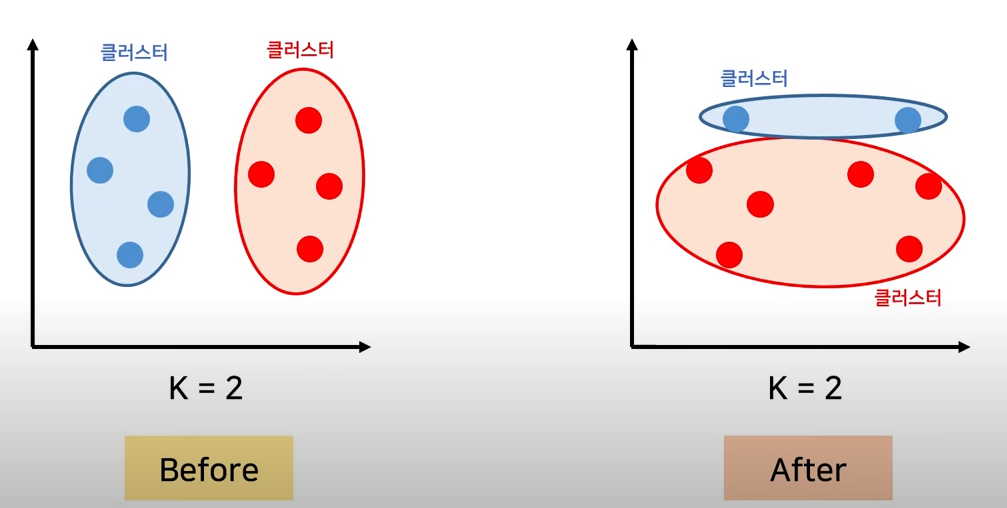

### K-means++
1. 데이터 중에서 랜덤으로 1개를 중심점으로 선택
1. 나머지 데이터로부터 중심점까지의 거리 계산
1. 중심점과 가장 먼 지점의 데이터를 다음 중심점으로 선택
1. 중심점이 k개가 될 때까지 반복
1. K-Means 전통적인 방식으로 진행

### 엘보우 커브
최적의 K값 찾기<br>
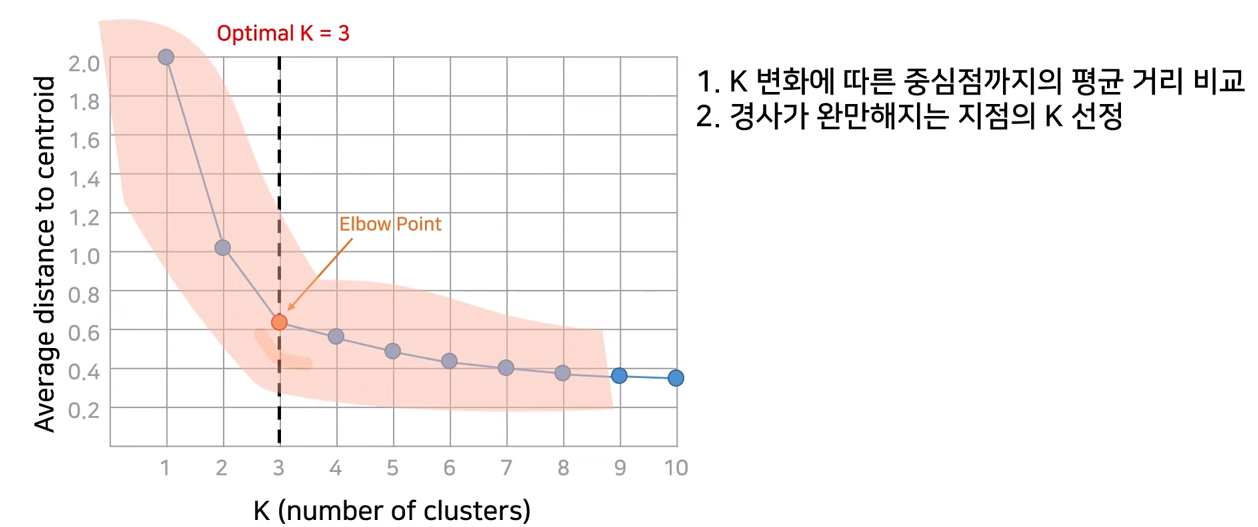

### 코사인 유사도 (Cosine Similarity)
각도가 작을 수록 서로 유사<br>
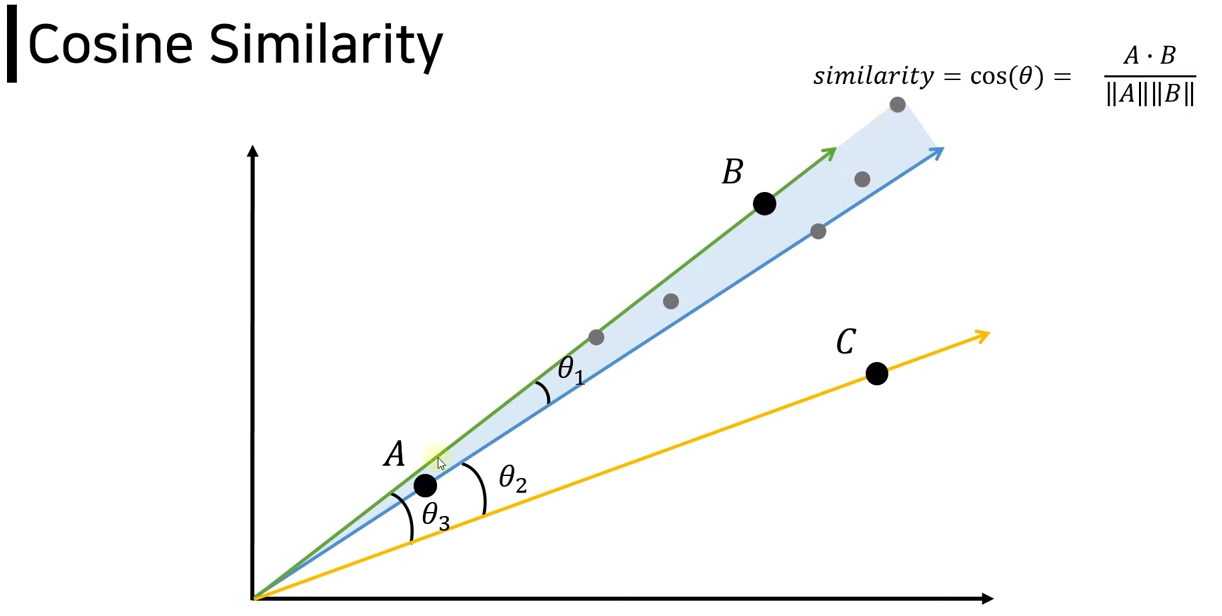

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]


,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [30]:
# 비지도학습이여서 종속변수 없음
X = dataset.values
# X = dataset.to_numpy()

### 데이터 시각화 (전체 데이터 분포 확인)

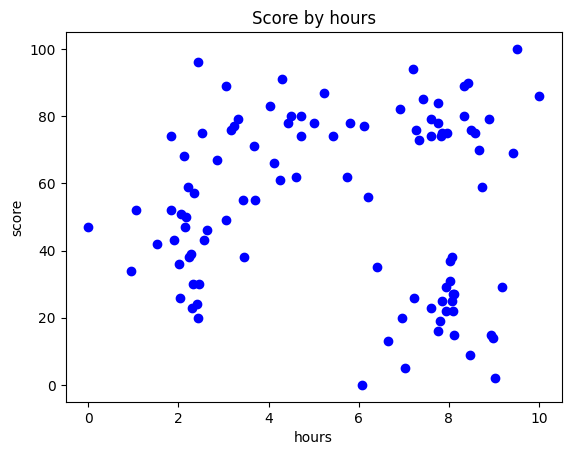

In [31]:
plt.scatter(X[:,0],X[:,1],color = "blue") # X 축 : hour, y 축 : score
plt.title("Score by hours") # 제목
plt.xlabel('hours')# X축 이름
plt.ylabel('score')# y축 이름
plt.show()

### 데이터 시각화(축 범위 통일)

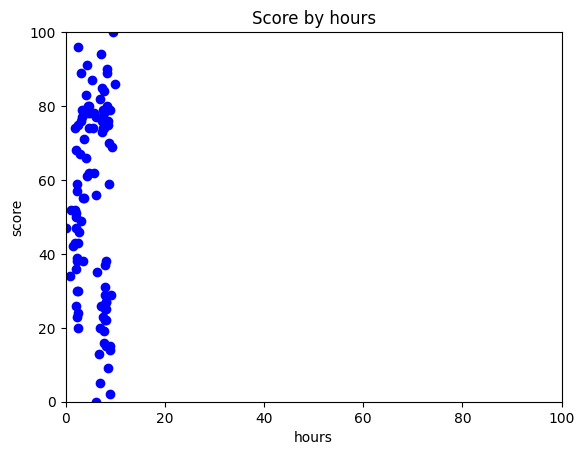

In [32]:
plt.scatter(X[:,0],X[:,1],color = "blue") # X 축 : hour, y 축 : score
plt.title("Score by hours") # 제목
plt.xlabel('hours')# X축 이름
plt.xlim(0,100)
plt.ylabel('score')# y축 이름
plt.ylim(0,100)
plt.show()

### 피처 스케일링(Feature Scaling)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링된 데이터)

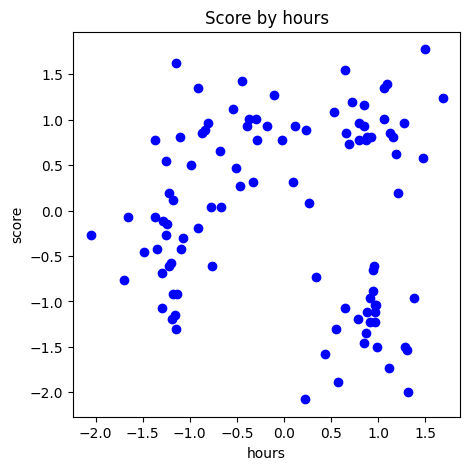

In [34]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],color = "blue") # X 축 : hour, y 축 : score
plt.title("Score by hours") # 제목
plt.xlabel('hours')# X축 이름
plt.ylabel('score')# y축 이름
plt.show()

### 최적의 k값 찾기(엘보우 커브)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

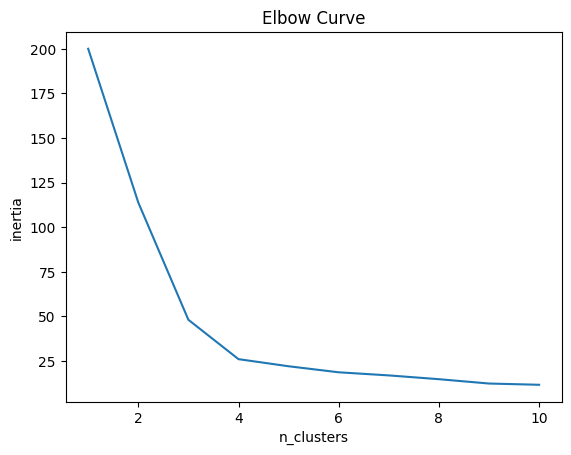

In [35]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) #각 지점으로부터 클러스터의 중심까지의 거리의 제곱의 합

plt.plot(range(1,11), inertia_list)
plt.title("Elbow Curve")
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K(4)값으로 KMeans 학습

In [36]:
K = 4 # 최적의 k값 찾음

In [37]:
kmeans = KMeans(n_clusters=K, random_state=0)
# kmeans.fit(X)
y_kmenas = kmeans.fit_predict(X)
# 클러스터 값 나오게 학습
y_kmenas

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

In [38]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

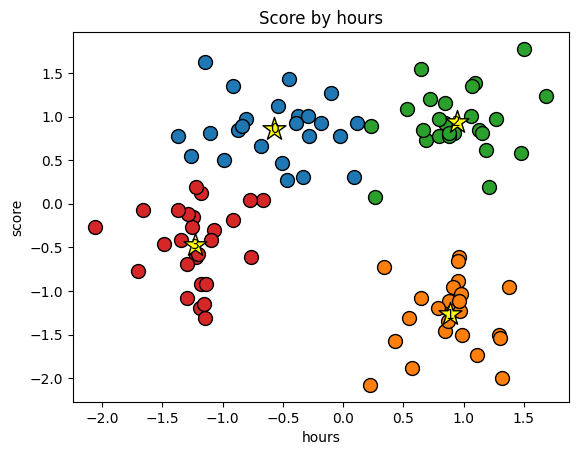

In [39]:
for cluster in range(K):
    plt.scatter(X[y_kmenas==cluster,0], X[y_kmenas==cluster,1], s = 100, edgecolor = "black")
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s = 300, edgecolors='black', marker='*', color = 'yellow')
    plt.text(centers[cluster, 0], centers[cluster, 1],cluster,va='center',ha='center')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화(스케일링 원복)

In [40]:
X_org = sc.inverse_transform(X) # Feature Scaling 된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [41]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

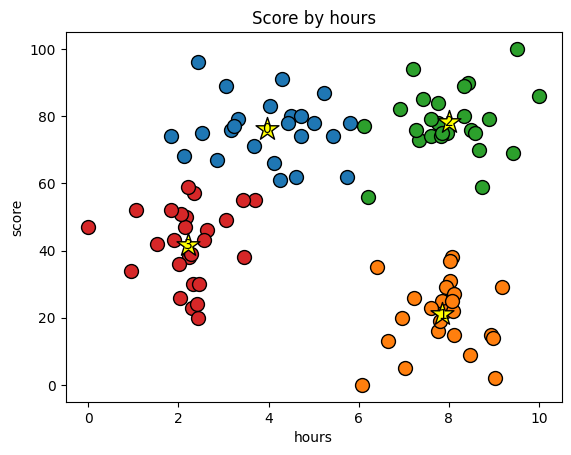

In [42]:
for cluster in range(K):
    plt.scatter(X_org[y_kmenas==cluster,0], X_org[y_kmenas==cluster,1], s = 100, edgecolor = "black")
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s = 300, edgecolors='black', marker='*', color = 'yellow')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1],cluster,va='center',ha='center')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

1. 0번쨰 그룹은 공부시간이 적은데 성적 좋은 애들
1. 1번째 그룹은 공부시간이 많은데 성적 나쁜 애들
1. 2번째 그룹은 공부시간 많고 성적 좋고 ->효율 좋게 공부하는 법 고민
1. 3번째 그룹은 공부 안하는 애